#### write out oceanic climatology for Fig. 4
taking all grids from tropical oceans (30S-30N)

In [2]:
import os
import sys
import xarray as xr
import numpy as np
from numpy import unravel_index
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from datetime import datetime
from pathlib import Path
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle

import warnings
warnings.filterwarnings('ignore')

In [3]:
# buoy_dir = Path('/neelin2020/ERA-5_buoy/layer_thetae/')
# files = list(buoy_dir.glob('*.nc'))[:10]

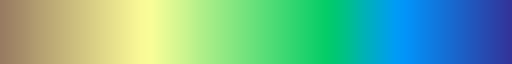

In [4]:
colors2 = plt.cm.terrain_r(np.linspace(0.3, 1, 45))
colors = np.vstack((colors2))
mixedmap = LinearSegmentedColormap.from_list('my_colormap', colors)
mixedmap

In [5]:
# %%time
# year = 2014
# era5_dir = Path('/neelin2020/ERA-5/NC_FILES/{}'.format(year))
# buoy_dir = Path('/neelin2020/ERA-5_buoy/layer_thetae/')
# gpm_dir = Path('/neelin2020/RGMA_feature_mask/GPM_ncfiles_{}'.format(year))
# omega_dir = Path('/scratch/wmtsai/ERA-5/NC_FILES/{}'.format(year))

# bins_cape = np.arange(-15,10,0.25)
# bins_subsat = np.arange(-5,25,0.25)
# samples = np.zeros((len(bins_cape)-1, len(bins_subsat)-1))
# omega_sum = np.copy(samples)
# prec_sum = np.copy(samples)

# for month in [1,3,5,7,9,11]:
#     print('month: {}'.format(str(month).zfill(2)))

#     # 1. 0.25-deg, 3-hourly buoyancy measure: BL = BL,cape - BL,subsat
#     buoy_files = list(buoy_dir.glob('era5_2layers_thetae_{}_{}_*.nc'.format(year,str(month).zfill(2))))
#     data_buoy = xr.open_mfdataset(buoy_files).sel(lat=slice(-30,30))

#     data_sp = xr.open_dataset(era5_dir / 'era-5.sp.{}.{}.nc'.format(year,str(month).zfill(2))).sel(latitude=slice(30
#     ,-30)).SP/100 # hPa
#     data_sp = data_sp.reindex(latitude=sorted(list(data_sp.latitude))) # fliping latitude order: -30 to 30
#     data_sp = data_sp.interp(latitude=data_buoy.lat.values, longitude=data_buoy.lon.values)
#     data_sp = data_sp.rename({'latitude': 'lat', 'longitude': 'lon'})
#     sp = data_sp.sel(time=data_buoy.time)

#     thetae_bl = data_buoy.thetae_bl
#     thetae_sat_lt = data_buoy.thetae_sat_lt
#     thetae_lt = data_buoy.thetae_lt

#     delta_pl=sp-100-500 # top at 500hPa
#     delta_pb=100
#     wb=(delta_pb/delta_pl)*np.log((delta_pl+delta_pb)/delta_pb)
#     wl=1-wb

#     Buoy_CAPE = wb * ((thetae_bl-thetae_sat_lt)/thetae_sat_lt) * 340
#     Buoy_SUBSAT = wl * ((thetae_sat_lt-thetae_lt)/thetae_sat_lt) * 340
#     Buoy_TOT = Buoy_CAPE - Buoy_SUBSAT # degree Kelvin (K)

#     # 2. 0.25-deg, 3-hrly GPM-IMERG, calibrated
#     gpm_files = list(gpm_dir.glob('GPM_IMERGE_V06_{}{}*.nc'.format(year,str(month).zfill(2))))
#     data_gpm = xr.open_mfdataset(gpm_files).sel(lat=slice(-30,30))
#     data_gpm['lon'] = data_gpm.lon.where(data_gpm.lon > 0, data_gpm.lon + 360)
#     data_gpm = data_gpm.reindex(lon = sorted(data_gpm.lon))
#     data_gpm = data_gpm.interp(lon = data_buoy.lon, lat = data_buoy.lat)
#     prec_gpm = data_gpm.precipitationCal.sel(time=data_buoy.time)    

#     data_omega = xr.open_dataset(omega_dir / 'era-5.omega.{}.{}.nc'.format(year,str(month).zfill(2))).sel(latitude=slice(30,-30))
#     omega850 = data_omega.reindex(latitude=sorted(list(data_omega.latitude)))
#     omega850 = omega850.sel(level=850).sel(time=data_buoy.time)
#     omega850 = omega850.rename({'latitude': 'lat', 'longitude': 'lon'})
#     omega850 = omega850.interp(lon = data_buoy.lon, lat = data_buoy.lat)

#     # load landsea mask for ocean grids only
#     landsea = xr.open_dataset('/neelin2020/RGMA_feature_mask/ERA5_LandSeaMask_regrid.nc4').sel(latitude=slice(-30,30))
#     landsea = landsea.rename({'latitude': 'lat', 'longitude': 'lon'})
#     landsea_regrid = landsea.landseamask.interp(lon=data_buoy.lon, lat=data_buoy.lat)

#     for t in range(len(Buoy_CAPE.time)):

#         buoy_cape_1d = Buoy_CAPE.isel(time=t)
#         buoy_cape_1d = buoy_cape_1d.where(landsea_regrid == 100).values.ravel()
#         buoy_subsat_1d = Buoy_SUBSAT.isel(time=t)
#         buoy_subsat_1d = buoy_subsat_1d.where(landsea_regrid == 100).values.ravel()
#         prec_1d = prec_gpm.isel(time=t)
#         prec_1d = prec_1d.where(landsea_regrid ==100).values.swapaxes(0,1).ravel()
#         omega_1d = omega850.isel(time=t).w
#         omega_1d = omega_1d.where(landsea_regrid == 100).values.ravel()

#         for i in np.arange(len(bins_cape)-1):
#             idx = np.where(np.logical_and(buoy_cape_1d >= bins_cape[i], buoy_cape_1d < bins_cape[i+1]))
#             for j in np.arange(len(bins_subsat)-1):
#                 idy = np.where(np.logical_and(buoy_subsat_1d >= bins_subsat[j], buoy_subsat_1d < bins_subsat[j+1]))
#                 idx_com = np.intersect1d(idx,idy)
#                 samples[i,j] += len(idx_com)
#                 omega_sum[i,j] += np.sum(omega_1d[idx_com])
#                 prec_sum[i,j] += np.sum(prec_1d[idx_com])

In [6]:
# # write out as a dataset
# out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/cape_subsat_hist')
# ds_clim = xr.Dataset(data_vars = dict(samples = (['bins_cape','bins_subsat'], samples),
#                                       omega_sum = (['bins_cape','bins_subsat'], omega_sum),
#                                       prec_sum = (['bins_cape','bins_subsat'], prec_sum)),
#                      coords = dict(bins_cape = (['bins_cape'], bins_cape[:-1]),
#                                    bins_subsat = (['bins_subsat'],bins_subsat[:-1]))
#                     )
# ds_clim.to_netcdf(out_dir / 'hist2d_cape_subsat_dtype.climatology.PrecOmega850.ocean.full.nc')

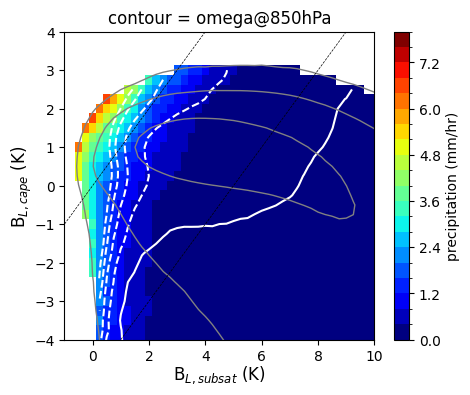

In [7]:
# read data
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/cape_subsat_clim/')
ds_clim_in = []
files = list(out_dir.glob('hist2d_cape_subsat_dtype.climatology.PrecOmega850.ocean.*.full.nc'))
for file in files:
    ds_clim_in.append(xr.open_dataset(file))
# merge individual files
ds_clim_in = xr.concat(ds_clim_in, pd.Index(np.arange(len(files)), name='time')).sum('time') 

fig = plt.figure(figsize=(5,4))
# dbl = 0.25
# bins_cape = ds_clim_in.bins_cape
# bins_subsat = ds_clim_in.bins_subsat
# ds_clim_in = ds_clim_in.interp(bins_cape=np.arange(bins_cape[0],bins_cape[-1]+dbl,dbl),
#                                             bins_subsat=np.arange(bins_subsat[0],bins_subsat[-1]+dbl,dbl))
cmap_norm = mixedmap
tmp = ds_clim_in.samples/ds_clim_in.samples.sum()
joint_prob = tmp.copy()
#joint_prob = joint_prob.where(joint_prob >= 1e-5)
cond_p = ds_clim_in.prec_sum/ds_clim_in.samples
cond_p = cond_p.where(tmp >= 1e-5)
cond_omega = ds_clim_in.omega_sum/ds_clim_in.samples
cond_omega = cond_omega.where(tmp >= 1e-5)
cp = plt.pcolormesh(ds_clim_in.bins_subsat, ds_clim_in.bins_cape, cond_p, cmap='jet',
                     norm = mpl.colors.BoundaryNorm(np.linspace(0,8,21), ncolors=cmap_norm.N))
plt.contour(ds_clim_in.bins_subsat, ds_clim_in.bins_cape, cond_omega, levels=[-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3], colors=['w'])
cf = plt.contour(ds_clim_in.bins_subsat, ds_clim_in.bins_cape, -np.log10(joint_prob), levels=[2,3,4,5], colors=['grey'],
            linewidths=1)
#plt.clabel(cf)

# add buoyancy reference 
plt.plot(np.linspace(-2,14,13),np.linspace(-2,14,13), color='k', ls='--', lw=0.5)
plt.plot(np.linspace(-2,14,13),np.linspace(-2,14,13)-5, color='k', ls='--', lw=0.5)

cbar = plt.colorbar(cp)
cbar.set_label('precipitation (mm/hr)')
plt.xlim([-1,10])
plt.ylim([-4,4])
plt.title('contour = omega@850hPa')
plt.xlabel('B$_{L,subsat}$ (K)',fontsize=12, labelpad=0)
plt.ylabel('B$_{L,cape}$ (K)',fontsize=12, labelpad=0)

plt.savefig('/scratch/wmtsai/temp_mcs/fig/BLhist2D_PrecOmega850_climat.pdf'
            ,bbox_inches='tight', transparent=False)

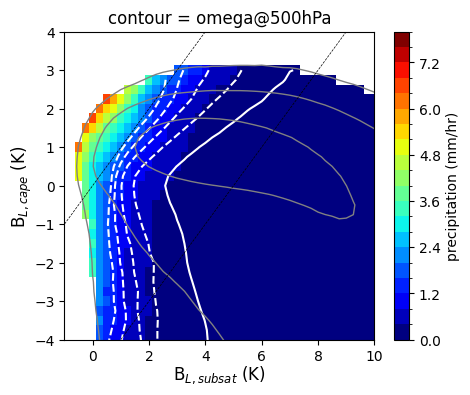

In [12]:
# read data
out_dir = Path('/scratch/wmtsai/temp_mcs/output_stats/cape_subsat_clim/')
ds_clim_in = []
files = list(out_dir.glob('hist2d_cape_subsat_dtype.climatology.PrecOmega500.ocean.*.full.nc'))
for file in files:
    ds_clim_in.append(xr.open_dataset(file))
# merge individual files
ds_clim_in = xr.concat(ds_clim_in, pd.Index(np.arange(len(files)), name='time')).sum('time') 

fig = plt.figure(figsize=(5,4))
# dbl = 0.25
# bins_cape = ds_clim_in.bins_cape
# bins_subsat = ds_clim_in.bins_subsat
# ds_clim_in = ds_clim_in.interp(bins_cape=np.arange(bins_cape[0],bins_cape[-1]+dbl,dbl),
#                                             bins_subsat=np.arange(bins_subsat[0],bins_subsat[-1]+dbl,dbl))
cmap_norm = mixedmap
tmp = ds_clim_in.samples/ds_clim_in.samples.sum()
joint_prob = tmp.copy()
#joint_prob = joint_prob.where(joint_prob >= 1e-5)
cond_p = ds_clim_in.prec_sum/ds_clim_in.samples
cond_p = cond_p.where(tmp >= 1e-5)
cond_omega = ds_clim_in.omega_sum/ds_clim_in.samples
cond_omega = cond_omega.where(tmp >= 1e-5)
cp = plt.pcolormesh(ds_clim_in.bins_subsat, ds_clim_in.bins_cape, cond_p, cmap='jet',
                     norm = mpl.colors.BoundaryNorm(np.linspace(0,8,21), ncolors=cmap_norm.N))
plt.contour(ds_clim_in.bins_subsat, ds_clim_in.bins_cape, cond_omega, levels=[-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3], colors=['w'])
cf = plt.contour(ds_clim_in.bins_subsat, ds_clim_in.bins_cape, -np.log10(joint_prob), levels=[2,3,4,5], colors=['grey'],
            linewidths=1)
#plt.clabel(cf)

# add buoyancy reference 
plt.plot(np.linspace(-2,14,13),np.linspace(-2,14,13), color='k', ls='--', lw=0.5)
plt.plot(np.linspace(-2,14,13),np.linspace(-2,14,13)-5, color='k', ls='--', lw=0.5)

cbar = plt.colorbar(cp)
cbar.set_label('precipitation (mm/hr)')
plt.xlim([-1,10])
plt.ylim([-4,4])
plt.title('contour = omega@500hPa')
plt.xlabel('B$_{L,subsat}$ (K)',fontsize=12, labelpad=0)
plt.ylabel('B$_{L,cape}$ (K)',fontsize=12, labelpad=0)

plt.savefig('/scratch/wmtsai/temp_mcs/fig/BLhist2D_PrecOmega500_climat.pdf'
            ,bbox_inches='tight', transparent=False)